# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Read data Excel

In [2]:
df_High= pd.read_csv('high.csv')

In [3]:
df_High.head()

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,01/02/2022,111001,JOIB,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0
1,01/02/2022,111002,JOKB,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0
2,01/02/2022,111003,JCBK,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0
3,01/02/2022,111004,THBK,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0
4,01/02/2022,111006,SIBK,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0


In [4]:
df_Low= pd.read_csv('low.csv')

In [5]:
df_Low.head()

,TRADE_DATE,SEC_CODE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,01/02/2022,111001,JOIB,1,199083.73,54378,73,3.65,2.65,585.0,3.13,2000.0
1,01/02/2022,111002,JOKB,1,12707.76,9009,17,1.41,1.36,493.0,1.86,1570.0
2,01/02/2022,111003,JCBK,2,727.41,726,7,1.00,1.14,1853.0,1.64,1000.0
3,01/02/2022,111004,THBK,1,1558.10,394,5,3.95,1.09,660.0,1.59,46.0
4,01/02/2022,111006,SIBK,1,29030.98,14867,11,1.95,1.23,1000.0,1.73,333.0


In [6]:
df_High.isnull().sum()

TRADE_DATE        0
SEC_CODE          0
SYMBOL1           0
MARKET            0
VOLUME            0
TRADE_QTY         0
NO_OF_TRADES      0
HIGH              0
BEST_ASK_PRICE    0
BEST_ASK_QTY      0
BEST_BID_PRICE    0
BEST_BID_QTY      0
dtype: int64

In [7]:
df_Low.isnull().sum()

TRADE_DATE        0
SEC_CODE          0
SYMBOL1           0
MARKET            0
VOLUME            0
TRADE_QTY         0
NO_OF_TRADES      0
LOW               0
BEST_ASK_PRICE    0
BEST_ASK_QTY      0
BEST_BID_PRICE    0
BEST_BID_QTY      0
dtype: int64

In [8]:
df_High.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRADE_DATE      28012 non-null  object 
 1   SEC_CODE        28012 non-null  int64  
 2   SYMBOL1         28012 non-null  object 
 3   MARKET          28012 non-null  int64  
 4   VOLUME          28012 non-null  float64
 5   TRADE_QTY       28012 non-null  int64  
 6   NO_OF_TRADES    28012 non-null  int64  
 7   HIGH            28012 non-null  float64
 8   BEST_ASK_PRICE  28012 non-null  float64
 9   BEST_ASK_QTY    28012 non-null  float64
 10  BEST_BID_PRICE  28012 non-null  float64
 11  BEST_BID_QTY    28012 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 2.6+ MB


In [9]:
df_Low.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28012 entries, 0 to 28011
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRADE_DATE      28012 non-null  object 
 1   SEC_CODE        28012 non-null  int64  
 2   SYMBOL1         28012 non-null  object 
 3   MARKET          28012 non-null  int64  
 4   VOLUME          28012 non-null  float64
 5   TRADE_QTY       28012 non-null  int64  
 6   NO_OF_TRADES    28012 non-null  int64  
 7   LOW             28012 non-null  float64
 8   BEST_ASK_PRICE  28012 non-null  float64
 9   BEST_ASK_QTY    28012 non-null  float64
 10  BEST_BID_PRICE  28012 non-null  float64
 11  BEST_BID_QTY    28012 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 2.6+ MB


In [10]:
df_High["TRADE_DATE"] = pd.to_datetime(df_High["TRADE_DATE"])
df_High["TRADE_DATE"]

C:\Users\USER\AppData\Local\Temp\ipykernel_13940\3800361518.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_High["TRADE_DATE"] = pd.to_datetime(df_High["TRADE_DATE"])


0       2022-01-02
1       2022-01-02
2       2022-01-02
3       2022-01-02
4       2022-01-02
           ...    
28007   2022-10-31
28008   2022-10-31
28009   2022-10-31
28010   2022-10-31
28011   2022-10-31
Name: TRADE_DATE, Length: 28012, dtype: datetime64[ns]

In [11]:
df_Low["TRADE_DATE"] = pd.to_datetime(df_Low["TRADE_DATE"])
df_Low["TRADE_DATE"]

C:\Users\USER\AppData\Local\Temp\ipykernel_13940\3284162572.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_Low["TRADE_DATE"] = pd.to_datetime(df_Low["TRADE_DATE"])


0       2022-01-02
1       2022-01-02
2       2022-01-02
3       2022-01-02
4       2022-01-02
           ...    
28007   2022-10-31
28008   2022-10-31
28009   2022-10-31
28010   2022-10-31
28011   2022-10-31
Name: TRADE_DATE, Length: 28012, dtype: datetime64[ns]

In [12]:
df_High.drop(['SEC_CODE'], axis=1, inplace=True)
df_Low.drop(['SEC_CODE'], axis=1, inplace=True)

In [13]:
df_High.head()

,TRADE_DATE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,2022-01-02,JOIB,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0
1,2022-01-02,JOKB,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0
2,2022-01-02,JCBK,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0
3,2022-01-02,THBK,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0
4,2022-01-02,SIBK,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0


In [14]:
df_High.shape

(28012, 11)

In [15]:
df_High.describe(include='all')

C:\Users\USER\AppData\Local\Temp\ipykernel_13940\4183960328.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_High.describe(include='all')


,TRADE_DATE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
count,28012,28012,28012.000000,2.801200e+04,2.801200e+04,28012.000000,28012.000000,28012.000000,2.801200e+04,28012.000000,2.801200e+04
unique,248,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-03-13 00:00:00,JOIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,135,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2022-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.385906,6.312677e+04,4.270346e+04,28.061545,1.713816,1.620775,1.979999e+04,2.113421,2.452341e+04
std,NaN,NaN,0.750480,3.022558e+05,1.451785e+05,66.231007,4.667872,1.520599,6.742718e+04,1.500857,1.008184e+05
min,NaN,NaN,0.000000,2.000000e-02,1.000000e+00,1.000000,0.020000,1.000000,0.000000e+00,1.500000,0.000000e+00
25%,NaN,NaN,1.000000,6.398300e+02,1.000000e+03,3.000000,0.380000,1.050000,5.000000e+02,1.550000,4.000000e+02


In [16]:
df_Low.describe(include='all')

C:\Users\USER\AppData\Local\Temp\ipykernel_13940\2735109194.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_Low.describe(include='all')


,TRADE_DATE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
count,28012,28012,28012.000000,2.801200e+04,2.801200e+04,28012.000000,28012.000000,28012.000000,2.801200e+04,28012.000000,2.801200e+04
unique,248,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-03-13 00:00:00,JOIB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,135,247,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2022-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2022-12-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.385906,6.312677e+04,4.270346e+04,28.061545,1.680022,1.620775,1.979999e+04,2.113421,2.452341e+04
std,NaN,NaN,0.750480,3.022558e+05,1.451785e+05,66.231007,4.580905,1.520599,6.742718e+04,1.500857,1.008184e+05
min,NaN,NaN,0.000000,2.000000e-02,1.000000e+00,1.000000,0.010000,1.000000,0.000000e+00,1.500000,0.000000e+00
25%,NaN,NaN,1.000000,6.398300e+02,1.000000e+03,3.000000,0.370000,1.050000,5.000000e+02,1.550000,4.000000e+02


In [17]:
df_High.dtypes

TRADE_DATE        datetime64[ns]
SYMBOL1                   object
MARKET                     int64
VOLUME                   float64
TRADE_QTY                  int64
NO_OF_TRADES               int64
HIGH                     float64
BEST_ASK_PRICE           float64
BEST_ASK_QTY             float64
BEST_BID_PRICE           float64
BEST_BID_QTY             float64
dtype: object

In [18]:
df_Low.dtypes

TRADE_DATE        datetime64[ns]
SYMBOL1                   object
MARKET                     int64
VOLUME                   float64
TRADE_QTY                  int64
NO_OF_TRADES               int64
LOW                      float64
BEST_ASK_PRICE           float64
BEST_ASK_QTY             float64
BEST_BID_PRICE           float64
BEST_BID_QTY             float64
dtype: object

In [19]:
# Find the number of unique values for each feature using the function nunique()
df_High.nunique()

TRADE_DATE          248
SYMBOL1             213
MARKET                3
VOLUME            24466
TRADE_QTY         15430
NO_OF_TRADES        500
HIGH               1072
BEST_ASK_PRICE      551
BEST_ASK_QTY      11371
BEST_BID_PRICE      551
BEST_BID_QTY      10083
dtype: int64

In [20]:
df_Low.nunique()

TRADE_DATE          248
SYMBOL1             213
MARKET                3
VOLUME            24466
TRADE_QTY         15430
NO_OF_TRADES        500
LOW                1007
BEST_ASK_PRICE      551
BEST_ASK_QTY      11371
BEST_BID_PRICE      551
BEST_BID_QTY      10083
dtype: int64

# 1. Apply Python programming language to demonstrate the descriptive analytics techniques by applying the following:

## a. Analyze at least three features by using appropriate measures and visualization charts

### Appropriate measures

In [21]:
df_High['VOLUME'].describe()

count    2.801200e+04
mean     6.312677e+04
std      3.022558e+05
min      2.000000e-02
25%      6.398300e+02
50%      3.831125e+03
75%      2.014495e+04
max      8.868824e+06
Name: VOLUME, dtype: float64

In [22]:
df_High['TRADE_QTY'].describe()

count    2.801200e+04
mean     4.270346e+04
std      1.451785e+05
min      1.000000e+00
25%      1.000000e+03
50%      5.873500e+03
75%      2.843675e+04
max      5.741963e+06
Name: TRADE_QTY, dtype: float64

In [23]:
df_Low['BEST_BID_QTY'].describe()

count    2.801200e+04
mean     2.452341e+04
std      1.008184e+05
min      0.000000e+00
25%      4.000000e+02
50%      1.912000e+03
75%      1.038675e+04
max      3.600734e+06
Name: BEST_BID_QTY, dtype: float64

In [24]:
df_High.groupby(["MARKET","BEST_BID_QTY"]).TRADE_QTY.mean()

MARKET  BEST_BID_QTY
0       0.0               7296.659341
        1.0              51888.428571
        2.0              12635.000000
        3.0              17307.500000
        4.0              13523.000000
                            ...      
2       929727.0          3436.000000
        978199.0        177775.000000
        1044480.0        35907.000000
        1052570.0        42540.000000
        2364140.0       128757.000000
Name: TRADE_QTY, Length: 12255, dtype: float64

In [25]:
df_High.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_13940\1477094466.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_High.corr()


,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
MARKET,1.000000,-0.034048,0.045583,0.001102,-0.089998,0.001116,-0.099576,0.001093,-0.089226
VOLUME,-0.034048,1.000000,0.620277,0.777427,0.310333,0.777378,-0.026209,0.777434,-0.011380
TRADE_QTY,0.045583,0.620277,1.000000,0.449219,-0.013221,0.449198,0.080231,0.449170,0.075985
NO_OF_TRADES,0.001102,0.777427,0.449219,1.000000,0.288890,0.999997,-0.020228,0.999998,0.001323
HIGH,-0.089998,0.310333,-0.013221,0.288890,1.000000,0.289028,-0.086154,0.289048,-0.070636
BEST_ASK_PRICE,0.001116,0.777378,0.449198,0.999997,0.289028,1.000000,-0.020253,0.999999,0.001313
BEST_ASK_QTY,-0.099576,-0.026209,0.080231,-0.020228,-0.086154,-0.020253,1.000000,-0.020260,0.271098
BEST_BID_PRICE,0.001093,0.777434,0.449170,0.999998,0.289048,0.999999,-0.020260,1.000000,0.001308
BEST_BID_QTY,-0.089226,-0.011380,0.075985,0.001323,-0.070636,0.001313,0.271098,0.001308,1.000000


In [38]:
frequency = df_High['SYMBOL1'].value_counts()
df_by_sec_code = df_High.groupby('SYMBOL1').size().reset_index(name='frequency')
relative_frequency = frequency / len(df_High)
df_by_sec_code['relative_frequency'] = df_by_sec_code['frequency'] / len(df_High)
cumulative_frequency = frequency.cumsum()
df_by_sec_code['cumulative_frequency'] = df_by_sec_code['frequency'].cumsum()
cumulative_frequency_relative = cumulative_frequency / len(df_High)
df_by_sec_code['cumulative_relative_frequency'] = df_by_sec_code['cumulative_frequency'] / len(df_High)
quartiles = frequency.quantile([0.25, 0.5, 0.75])
complaints_quartile = pd.cut(frequency,bins=3,labels=(['Q1', 'Q2', 'Q3']))
quartiles = df_by_sec_code['frequency'].quantile([0.25, 0.5, 0.75])
df_by_sec_code['quartile'] = pd.cut(df_by_sec_code['frequency'], bins=3, labels=(['Q1', 'Q2', 'Q3']))
df_by_sec_code

,SYMBOL1,frequency,relative_frequency,cumulative_frequency,cumulative_relative_frequency,quartile
0,AAIN,33,0.001178,33,0.001178,Q1
1,AALU,115,0.004105,148,0.005283,Q2
2,ABCO,197,0.007033,345,0.012316,Q3
3,ABLA,190,0.006783,535,0.019099,Q3
4,ABMS,14,0.000500,549,0.019599,Q1
...,...,...,...,...,...,...
208,WIRE,205,0.007318,27621,0.986042,Q3
209,WIVA,175,0.006247,27796,0.992289,Q3
210,WOOD,2,0.000071,27798,0.992360,Q1
211,ZARA,106,0.003784,27904,0.996145,Q2


In [39]:
mean = df_High['BEST_BID_QTY'].mean()
std = df_High['BEST_BID_QTY'].std()
df_High['z-scoreBBQ'] = (df_High['BEST_BID_QTY'] - mean) / std
df_High['z-scoreBBQ']

0       -0.223406
1       -0.227671
2       -0.233325
3       -0.242787
4       -0.239941
           ...   
28007   -0.243243
28008   -0.097338
28009   -0.243243
28010   -0.238284
28011   -0.243045
Name: z-scoreBBQ, Length: 28012, dtype: float64

In [40]:
mean = df_High['MARKET'].mean()
std = df_High['MARKET'].std()
df_High['z_score'] = (df_High['MARKET'] - mean) / std
df_High['z_score']

0       -0.514212
1       -0.514212
2        0.818268
3       -0.514212
4       -0.514212
           ...   
28007    0.818268
28008    0.818268
28009    0.818268
28010   -0.514212
28011   -0.514212
Name: z_score, Length: 28012, dtype: float64

In [ ]:
idxOutliers = df_High[(df_High['z_score'] > -0.5) | (df_High['z_score'] < -0.5)]['z_score']
idxOutliers

In [ ]:
idxOutliers.value_counts()

### Visualization charts

In [ ]:
# Density plot
sns.kdeplot(df_High['z_score'])
plt.show()

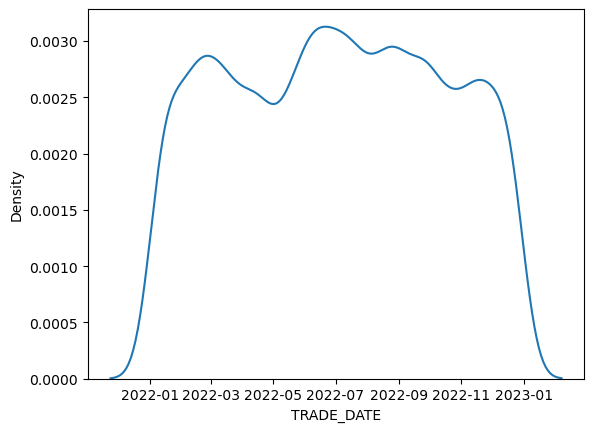

In [44]:
# Density plot
sns.kdeplot(df_High['TRADE_DATE'])
plt.show()

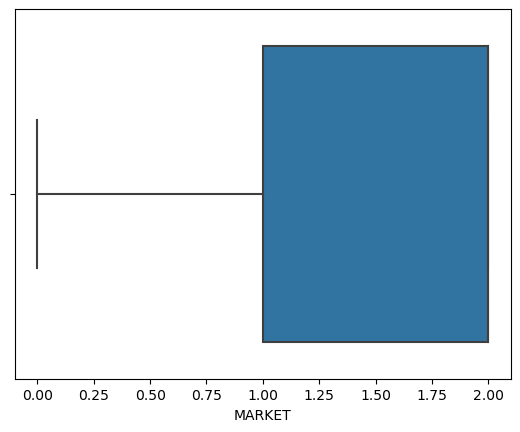

In [45]:
# Box plot
sns.boxplot(x=df_High['MARKET'])
plt.show()

<Axes: xlabel='MARKET', ylabel='TRADE_QTY'>

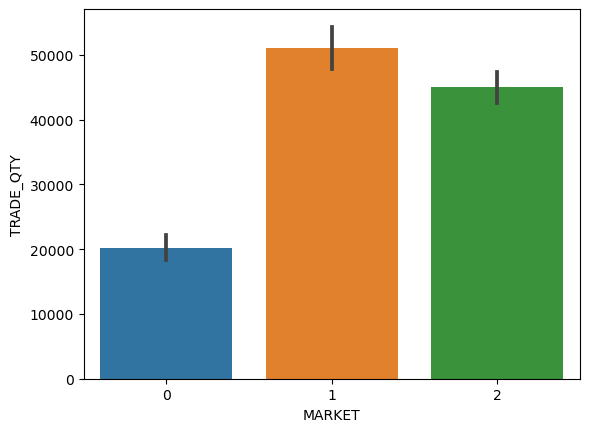

In [46]:
sns.barplot(x= df_High['MARKET'], y= df_High['TRADE_QTY'])

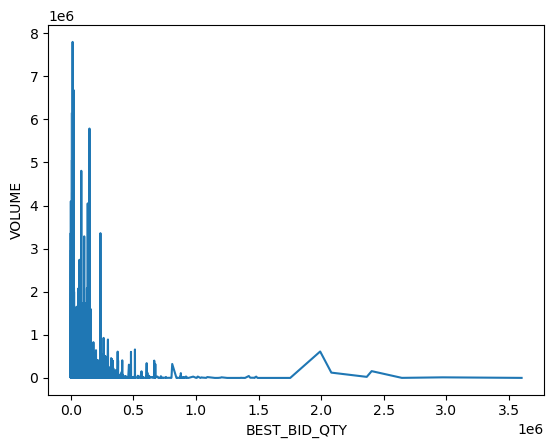

In [47]:
sns.lineplot(x=df_High['BEST_BID_QTY'], y=df_Low['VOLUME'])
plt.show()

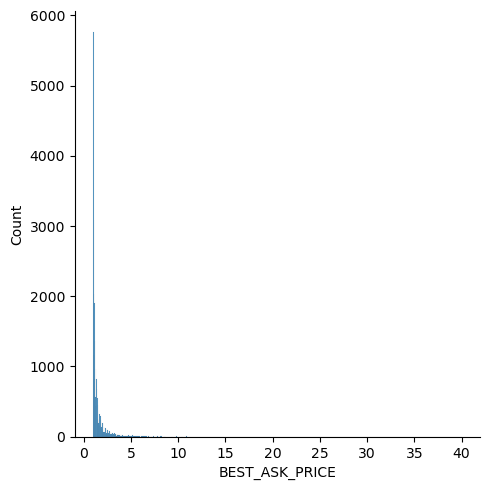

In [48]:
sns.displot(x="BEST_ASK_PRICE", data=df_Low) 
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_13940\2894185791.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_High.corr())


<function matplotlib.pyplot.show(close=None, block=None)>

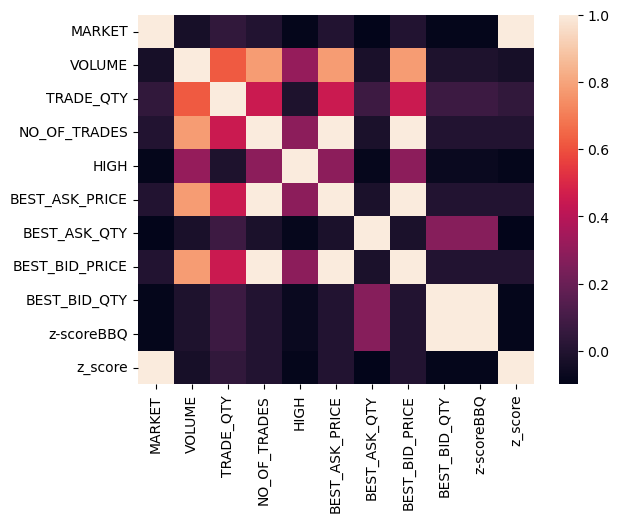

In [49]:
sns.heatmap(df_High.corr())
plt.show

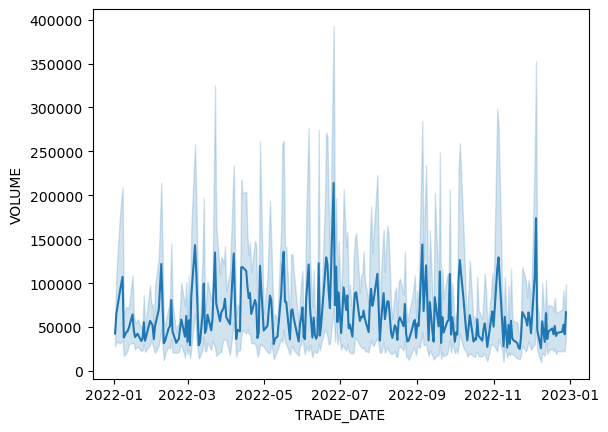

In [50]:
sns.lineplot(y=df_High['VOLUME'], x= df_High['TRADE_DATE'])
plt.show()

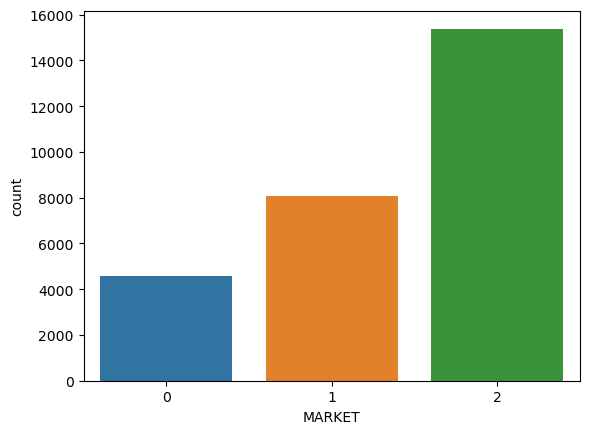

In [51]:
sns.countplot(x="MARKET",data = df_Low)
plt.show()

<Axes: xlabel='VOLUME', ylabel='TRADE_QTY'>

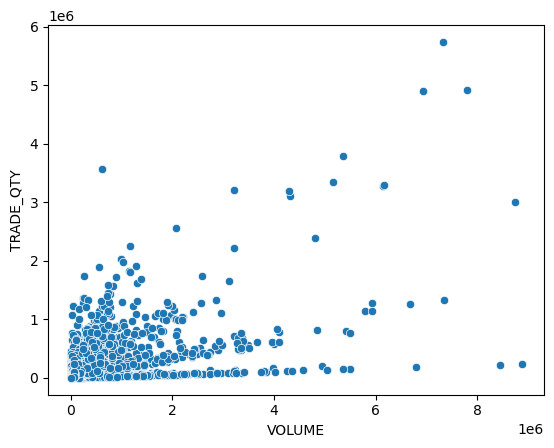

In [52]:
sns.scatterplot(x="VOLUME", y="TRADE_QTY", data=df_Low)

<Axes: xlabel='BEST_ASK_PRICE', ylabel='BEST_BID_PRICE'>

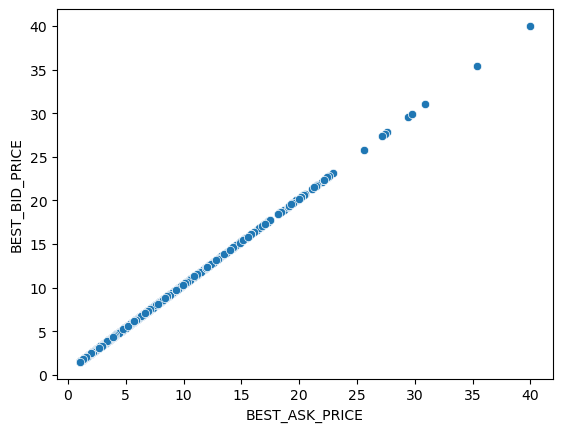

In [53]:
sns.scatterplot(x="BEST_ASK_PRICE", y="BEST_BID_PRICE", data=df_Low)

<Axes: xlabel='NO_OF_TRADES', ylabel='VOLUME'>

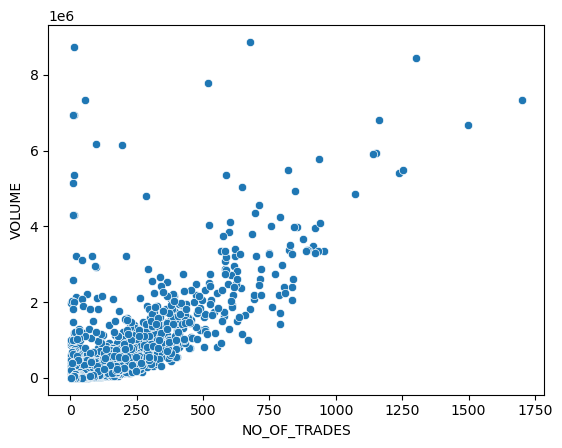

In [54]:
sns.scatterplot(x="NO_OF_TRADES", y="VOLUME", data=df_High)

## b. Using a contingency table and association measures, find an association between at least two features

In [55]:
contingency_table = pd.crosstab(
    index=df_High['MARKET'],
    columns=df_High['VOLUME'],
    margins=True
)
contingency_table

VOLUME,0.02,0.03,0.04,0.06,0.08,0.09,0.12,0.16,0.17,0.18,...,6795976.03,6935515.56,6936994.64,7327564.15,7333132.22,7795035.95,8438649.83,8733137.45,8868824.37,All
MARKET,,,,,,,,,,,,,,,,,,,,,
0,2,2,4,1,1,2,1,1,1,9,...,0,0,0,0,0,0,0,0,0,4569
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,0,1,0,1,8064
2,0,0,0,0,0,0,1,0,1,1,...,0,1,1,0,0,1,0,1,0,15379
All,2,2,4,1,1,2,2,1,2,10,...,1,1,1,1,1,1,1,1,1,28012


In [56]:
df_Low.head()

,TRADE_DATE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,2022-01-02,JOIB,1,199083.73,54378,73,3.65,2.65,585.0,3.13,2000.0
1,2022-01-02,JOKB,1,12707.76,9009,17,1.41,1.36,493.0,1.86,1570.0
2,2022-01-02,JCBK,2,727.41,726,7,1.00,1.14,1853.0,1.64,1000.0
3,2022-01-02,THBK,1,1558.10,394,5,3.95,1.09,660.0,1.59,46.0
4,2022-01-02,SIBK,1,29030.98,14867,11,1.95,1.23,1000.0,1.73,333.0


In [57]:
# Calculate marginal totals for each variable
marginal_totals_High = df_High[['SYMBOL1','MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'HIGH', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY']].sum()
marginal_totals_High

SYMBOL1           JOIBJOKBJCBKTHBKSIBKUBSIABCOINVBCAPLCABKBOJXBA...
MARKET                                                        38822
VOLUME                                                1768306984.28
TRADE_QTY                                                1196209374
NO_OF_TRADES                                                 786060
HIGH                                                        48007.4
BEST_ASK_PRICE                                             45401.16
BEST_ASK_QTY                                            554637272.0
BEST_BID_PRICE                                             59201.16
BEST_BID_QTY                                            686949820.0
dtype: object

In [58]:
marginal_totals_Low = df_Low[['SYMBOL1','MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'LOW', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY']].sum()
marginal_totals_Low

SYMBOL1           JOIBJOKBJCBKTHBKSIBKUBSIABCOINVBCAPLCABKBOJXBA...
MARKET                                                        38822
VOLUME                                                1768306984.28
TRADE_QTY                                                1196209374
NO_OF_TRADES                                                 786060
LOW                                                        47060.77
BEST_ASK_PRICE                                             45401.16
BEST_ASK_QTY                                            554637272.0
BEST_BID_PRICE                                             59201.16
BEST_BID_QTY                                            686949820.0
dtype: object

In [59]:
# Calculate row percentages
row_percentages = df_High[['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'HIGH', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY']].apply(lambda x: x.value_counts(normalize=True) * 100)
row_percentages

,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0.00,16.310867,NaN,NaN,NaN,NaN,NaN,0.453377,NaN,1.842068
0.02,NaN,0.00714,NaN,NaN,0.217764,NaN,NaN,NaN,NaN
0.03,NaN,0.00714,NaN,NaN,0.435528,NaN,NaN,NaN,NaN
0.04,NaN,0.01428,NaN,NaN,0.835356,NaN,NaN,NaN,NaN
0.05,NaN,NaN,NaN,NaN,0.189205,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7333132.22,NaN,0.00357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7795035.95,NaN,0.00357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8438649.83,NaN,0.00357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8733137.45,NaN,0.00357,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Calculate column percentages
column_percentages = df_Low[['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'LOW', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY']].apply(lambda x: x.groupby(x).count() / len(df_Low) * 100)
column_percentages

,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0.00,16.310867,NaN,NaN,NaN,NaN,NaN,0.453377,NaN,1.842068
0.01,NaN,NaN,NaN,NaN,0.028559,NaN,NaN,NaN,NaN
0.02,NaN,0.00714,NaN,NaN,0.456947,NaN,NaN,NaN,NaN
0.03,NaN,0.00714,NaN,NaN,0.510496,NaN,NaN,NaN,NaN
0.04,NaN,0.01428,NaN,NaN,0.614023,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
7333132.22,NaN,0.00357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7795035.95,NaN,0.00357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8438649.83,NaN,0.00357,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8733137.45,NaN,0.00357,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Calculate average satisfaction rating
average_satisfaction = df_High[['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'HIGH', 'BEST_ASK_PRICE', 'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY']].mean().mean()
print("Average Satisfaction Rating:", average_satisfaction)

Average Satisfaction Rating: 16687.613808367845


# 2. Apply Python programming language to demonstrate these predictive analytic techniques by applying the following:

### a. Apply a feature selection technique to find the best features that help the model achieve the best stock price prediction.

### Removing features with low variance method (HIGH)

In [62]:
df_High.head()

,TRADE_DATE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,HIGH,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY,z-scoreBBQ,z_score
0,2022-01-02,JOIB,1,199083.73,54378,73,3.67,2.65,585.0,3.13,2000.0,-0.223406,-0.514212
1,2022-01-02,JOKB,1,12707.76,9009,17,1.42,1.36,493.0,1.86,1570.0,-0.227671,-0.514212
2,2022-01-02,JCBK,2,727.41,726,7,1.03,1.14,1853.0,1.64,1000.0,-0.233325,0.818268
3,2022-01-02,THBK,1,1558.10,394,5,3.97,1.09,660.0,1.59,46.0,-0.242787,-0.514212
4,2022-01-02,SIBK,1,29030.98,14867,11,1.98,1.23,1000.0,1.73,333.0,-0.239941,-0.514212


In [63]:
feature_vector1=df_High.drop(["HIGH","TRADE_DATE","z-scoreBBQ","z_score","SYMBOL1"], axis=1)
target_vector1=df_High["HIGH"]

In [64]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

In [109]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(feature_vector1, target_vector1, test_size=0.4, random_state=0)

In [110]:
from sklearn.linear_model import LinearRegression
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

LinearRegression()

In [111]:
y_pred1 = regressor1.predict(X_test1)
y_pred1

array([1.74873227, 0.79632955, 2.05102389, ..., 1.29774309, 2.5997059 ,
       1.62457352])

In [112]:
df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
df1

,Actual,Predicted
17783,0.47,1.748732
25579,0.15,0.796330
13639,1.28,2.051024
1885,1.15,2.154627
15132,2.11,1.416963
...,...,...
24890,0.17,-0.611531
19349,2.89,2.066004
4234,1.00,1.297743
17219,0.20,2.599706


In [113]:
regressor1.score(feature_vector1, target_vector1)

0.1788879883864437

In [114]:
print(regressor1.intercept_)

-188.88611992357193


In [115]:
print(regressor1.coef_)

[-4.41182987e-01  6.88061606e-06 -9.92457334e-06 -2.85030885e+00
 -8.94535646e+00 -3.08536184e-06  1.35242702e+02 -1.81940679e-06]


### SelectKBest method (HIGH)

In [72]:
from sklearn.feature_selection import SelectKBest, f_regression
# split the data into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(feature_vector1, target_vector1, test_size=0.33, random_state=15)

# instantiate the feature selection model
selector2 = SelectKBest(f_regression, k=8)

# fit the model on the training data
selector2.fit(X_train2, y_train2)

# transform the training and testing sets to keep only the selected features
X_train_selected2 = selector2.transform(X_train2)
X_test_selected2 = selector2.transform(X_test2)

# train a linear regression model on the selected features
model2 = LinearRegression()
model2.fit(X_train_selected2, y_train2)

# make predictions on the testing set
y_pred2 = model2.predict(X_test_selected2)

# calculate regression metrics
mae2 = mean_absolute_error(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
rmse2 = mean_squared_error(y_test2, y_pred2, squared=False)
r22 = r2_score(y_test2, y_pred2)

# print the selected features and regression metrics
print("Selected features:", feature_vector1.columns[selector2.get_support()])
print("MAE:", mae2)
print("MSE:", mse2)
print("RMSE:", rmse2)
print("R2:", r22)

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY'],
      dtype='object')
MAE: 1.5381231022330832
MSE: 18.559820232239662
RMSE: 4.308110981885177
R2: 0.18641303290295663


### Sequential Feature Selection (HIGH)

In [73]:
from sklearn.feature_selection import SequentialFeatureSelector

# Split the dataset into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(feature_vector1,target_vector1, test_size=0.2, random_state=42)

model3 = LinearRegression()
sfs3 = SequentialFeatureSelector(model3, n_features_to_select=6, direction='backward') #backward
sfs3.fit(X_train3, y_train3)
selected_features3 = feature_vector1.columns[sfs3.get_support()]
print("Selected features:", selected_features3)

X_train_selected3 = sfs3.transform(X_train3)
X_test_selected3 = sfs3.transform(X_test3)
model3.fit(X_train_selected3, y_train3)

y_pred3 = model3.predict(X_test_selected3)

# Calculate the regression metrics
mae3 = mean_absolute_error(y_test3, y_pred3)
mse3 = mean_squared_error(y_test3, y_pred3)
rmse3 = mean_squared_error(y_test3, y_pred3, squared=False)
r23 = r2_score(y_test3, y_pred3)

print("Regression Metrics:")
print("MAE:", mae3)
print("MSE:", mse3)
print("RMSE:", rmse3)
print("R²:", r23)

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_QTY',
       'BEST_BID_PRICE'],
      dtype='object')
Regression Metrics:
MAE: 1.4797041232234296
MSE: 16.770098474609256
RMSE: 4.095131069283284
R²: 0.1900416493898074


### Removing features with low variance method (LOW)

In [74]:
df_Low.head()

,TRADE_DATE,SYMBOL1,MARKET,VOLUME,TRADE_QTY,NO_OF_TRADES,LOW,BEST_ASK_PRICE,BEST_ASK_QTY,BEST_BID_PRICE,BEST_BID_QTY
0,2022-01-02,JOIB,1,199083.73,54378,73,3.65,2.65,585.0,3.13,2000.0
1,2022-01-02,JOKB,1,12707.76,9009,17,1.41,1.36,493.0,1.86,1570.0
2,2022-01-02,JCBK,2,727.41,726,7,1.00,1.14,1853.0,1.64,1000.0
3,2022-01-02,THBK,1,1558.10,394,5,3.95,1.09,660.0,1.59,46.0
4,2022-01-02,SIBK,1,29030.98,14867,11,1.95,1.23,1000.0,1.73,333.0


In [75]:
feature_vector2=df_Low.drop(["TRADE_DATE","SYMBOL1", "LOW"], axis=1)
target_vector2=df_Low["LOW"]

In [76]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(feature_vector2, target_vector2, test_size=0.33, random_state=15)

In [77]:
from sklearn.linear_model import LinearRegression
regressor2 = LinearRegression()
regressor2.fit(X_train4, y_train4)

LinearRegression()

In [78]:
y_pred4 = regressor2.predict(X_test4)
y_pred4

array([1.39795423, 2.65091449, 2.02571433, ..., 1.09229096, 1.73212879,
       0.81149898])

In [79]:
df2 = pd.DataFrame({'Actual': y_test4, 'Predicted': y_pred4})
df2

,Actual,Predicted
3838,0.71,1.397954
22862,0.38,2.650914
12521,4.67,2.025714
3705,0.40,1.206960
6526,38.40,26.624466
...,...,...
7906,0.36,2.131352
12921,24.70,7.709380
25237,0.50,1.092291
4892,0.59,1.732129


In [80]:
regressor2.score(feature_vector2, target_vector2)

0.17641615751324125

In [81]:
print(regressor2.intercept_)

-158.46892317717143


In [82]:
print(regressor2.coef_)

[-4.02550133e-01  6.55655324e-06 -9.59249682e-06 -2.47769470e+00
  2.57038429e+00 -2.83961711e-06  1.07009699e+02 -1.72699852e-06]


### SelectKBest method (LOW)

In [83]:
from sklearn.feature_selection import SelectKBest, f_regression
# split the data into training and testing sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(feature_vector2, target_vector2, test_size=0.33, random_state=15)

# instantiate the feature selection model
selector5 = SelectKBest(f_regression, k=8)

# fit the model on the training data
selector5.fit(X_train5, y_train5)

# transform the training and testing sets to keep only the selected features
X_train_selected5 = selector5.transform(X_train5)
X_test_selected5 = selector5.transform(X_test5)

# train a linear regression model on the selected features
model5 = LinearRegression()
model5.fit(X_train_selected5, y_train5)

# make predictions on the testing set
y_pred5 = model5.predict(X_test_selected5)

# calculate regression metrics
mae5 = mean_absolute_error(y_test5, y_pred5)
mse5 = mean_squared_error(y_test5, y_pred5)
rmse5 = mean_squared_error(y_test5, y_pred5, squared=False)
r25 = r2_score(y_test5, y_pred5)

# print the selected features and regression metrics
print("Selected features:", feature_vector2.columns[selector5.get_support()])
print("MAE:", mae5)
print("MSE:", mse5)
print("RMSE:", rmse5)
print("R2:", r25)

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_PRICE',
       'BEST_ASK_QTY', 'BEST_BID_PRICE', 'BEST_BID_QTY'],
      dtype='object')
MAE: 1.5150098072492377
MSE: 17.99222828510346
RMSE: 4.241724682850534
R2: 0.1812086455638381


### Sequential Feature Selection (LOW)

In [84]:
from sklearn.feature_selection import SequentialFeatureSelector

# Split the dataset into training and testing sets
X_train6, X_test6, y_train6, y_test6 = train_test_split(feature_vector2,target_vector2, test_size=0.2, random_state=42)

model6 = LinearRegression()
sfs6 = SequentialFeatureSelector(model6, n_features_to_select=7, direction='backward') #backward
sfs6.fit(X_train6, y_train6)
selected_features6 = feature_vector2.columns[sfs6.get_support()]
print("Selected features:", selected_features6)

X_train_selected6 = sfs6.transform(X_train6)
X_test_selected6 = sfs6.transform(X_test6)
model6.fit(X_train_selected6, y_train6)

y_pred6 = model6.predict(X_test_selected6)

# Calculate the regression metrics
mae6 = mean_absolute_error(y_test6, y_pred6)
mse6 = mean_squared_error(y_test6, y_pred6)
rmse6 = mean_squared_error(y_test6, y_pred6, squared=False)
r26 = r2_score(y_test6, y_pred6)

print("Regression Metrics:")
print("MAE:", mae6)
print("MSE:", mse6)
print("RMSE:", rmse6)
print("R²:", r26)

Selected features: Index(['MARKET', 'VOLUME', 'TRADE_QTY', 'NO_OF_TRADES', 'BEST_ASK_QTY',
       'BEST_BID_PRICE', 'BEST_BID_QTY'],
      dtype='object')
Regression Metrics:
MAE: 1.4549044975018681
MSE: 16.27351277621996
RMSE: 4.034044220905363
R²: 0.1847477931268292


## b. Predict the “high” label (peak stock price) and “low” label (trough stock price) using different techniques.

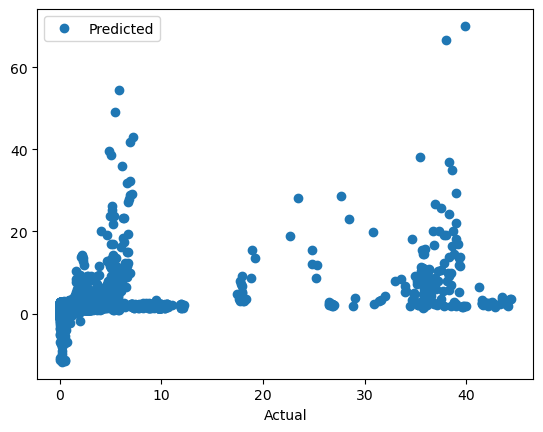

In [116]:
df1.plot(x='Actual', y= 'Predicted', style='o')
plt.show()

## c. Compare the results of the different techniques using appropriate evaluation measures

## d. Visualize the results using proper charts to show the quality of the different predictive models.

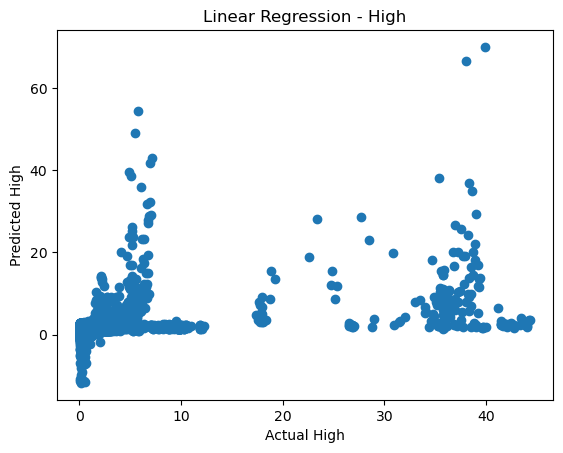

In [119]:
plt.scatter(y_test1, y_pred1)
plt.xlabel("Actual High")
plt.ylabel("Predicted High")
plt.title("Linear Regression - High")
plt.show()

In [ ]:
X=df['VOLUME']
y=df['HIGH']

In [ ]:
#plot
plt.scatter(X, target_vector1, color = 'blue')
plt.plot(feature_vector1, regressor1.predict(feature_vector1), color = 'black')
plt.show()

In [ ]:
df.plot(x='HIGH', y='LOW', style='o')
plt.show()